===========iteration:0===========
SGD:2.3370864136463285
Momentum:2.3518003608117266
AdaGrad:2.0776183665727324
Adam:2.1518456096542535
RMSprop:14.481101551251612
===========iteration:100===========
SGD:1.22667703124527
Momentum:0.2831053043214279
AdaGrad:0.11104630644314864
Adam:0.16532231018709892
RMSprop:0.5481644485448038
===========iteration:200===========
SGD:0.7097310457680057
Momentum:0.16014078285975097
AdaGrad:0.06630083623362343
Adam:0.15604335282614534
RMSprop:0.33271789399907226
===========iteration:300===========
SGD:0.6333444098455319
Momentum:0.3771104993286613
AdaGrad:0.19580910010554958
Adam:0.2867694812409215
RMSprop:0.3524343886355083
===========iteration:400===========
SGD:0.3625832218746971
Momentum:0.14556807116496173
AdaGrad:0.06175816694968221
Adam:0.08370444317622033
RMSprop:0.15132918108095858
===========iteration:500===========
SGD:0.30072127230279305
Momentum:0.10346065667657903
AdaGrad:0.07139263926436844
Adam:0.06489074654798463
RMSprop:0.1096572303333580

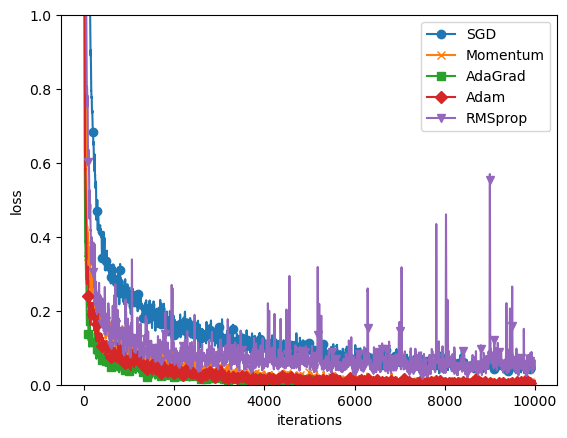

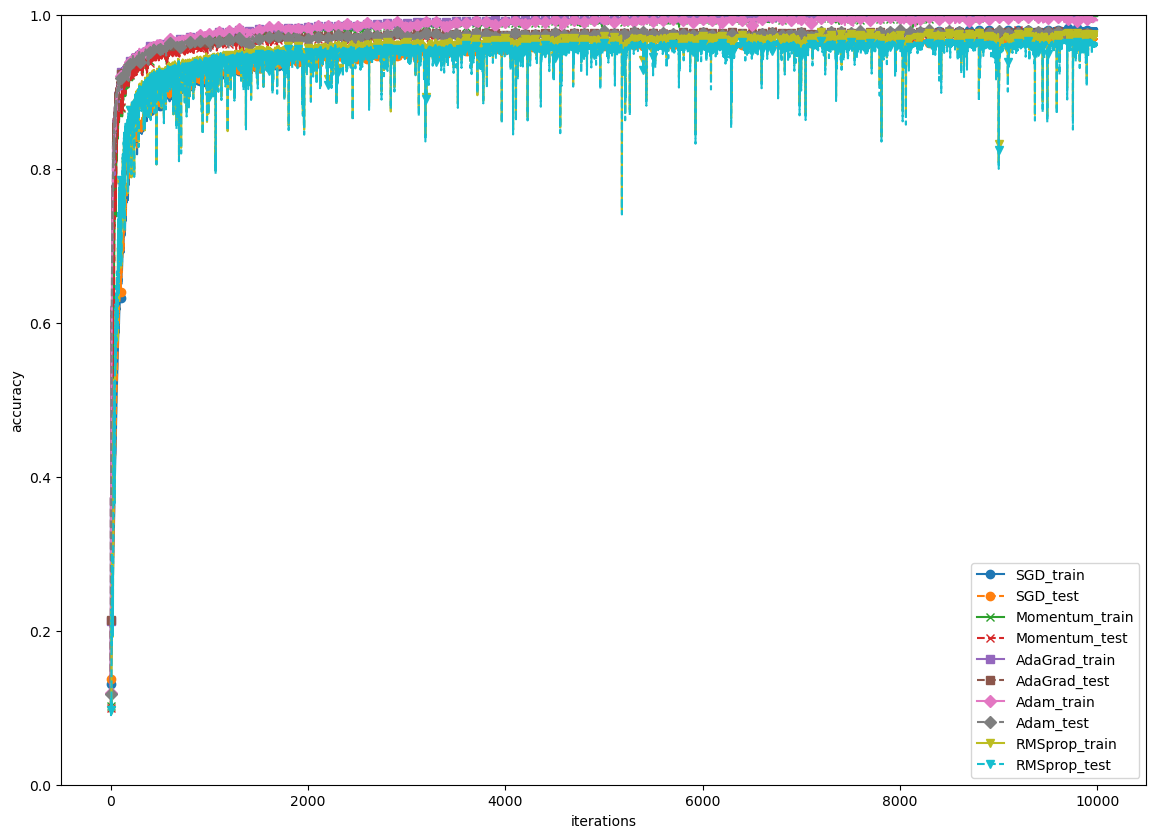

In [7]:
import os
import sys
sys.path.append(os.pardir)  
import numpy as np
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
from common.util import smooth_curve
from common.multi_layer_net import MultiLayerNet
from common.optimizer import SGD, Adam, RMSprop, AdaGrad, Momentum

(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

train_size = x_train.shape[0]
batch_size = 128
max_iterations = 10000
 
optimizers = {}
optimizers['SGD'] = SGD()
optimizers['Momentum'] = Momentum()
optimizers['AdaGrad'] = AdaGrad()
optimizers['Adam'] = Adam()
optimizers['RMSprop'] = RMSprop()

networks = {}
train_loss = {}
train_acc = {}
test_acc = {}

# 하이퍼파라미터 범위 설정
learning_rate = np.random.uniform(0.001, 0.019)
hidden_size = np.random.randint(5, 16)

# Affine 계층 추가
hidden_layer_sizes = [100] * hidden_size

for key in optimizers.keys():
    networks[key] = MultiLayerNet(
        input_size=784, hidden_size_list=hidden_layer_sizes, output_size=10)
    train_loss[key] = []
    train_acc[key] = []
    test_acc[key] = []

for i in range(max_iterations):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]
    
    for key in optimizers.keys():
        grads = networks[key].gradient(x_batch, t_batch)
        optimizers[key].update(networks[key].params, grads)
    
        loss = networks[key].loss(x_batch, t_batch)
        train_loss[key].append(loss)
    
        train_acc[key].append(networks[key].accuracy(x_train, t_train))
        test_acc[key].append(networks[key].accuracy(x_test, t_test))
    
    if i % 100 == 0:
        print("===========" + "iteration:" + str(i) + "===========")
        for key in optimizers.keys():
            loss = networks[key].loss(x_batch, t_batch)
            print(key + ":" + str(loss))

# 그래프
markers = {"SGD": "o", "Momentum": "x", "AdaGrad": "s", "Adam": "D", "RMSprop": "v"}
x = np.arange(max_iterations)
for key in optimizers.keys():
    plt.plot(x, smooth_curve(train_loss[key]), marker=markers[key], markevery=100, label=key)
plt.xlabel("iterations")
plt.ylabel("loss")
plt.ylim(0, 1)
plt.legend()
plt.show()

# 정확도 그래프 
plt.figure(figsize=(14,10))
for key in optimizers.keys():
    plt.plot(x, train_acc[key], marker=markers[key], markevery=100, label=key + '_train', linestyle='-')
    plt.plot(x, test_acc[key], marker=markers[key], markevery=100, label=key + '_test', linestyle='--')
plt.xlabel("iterations")
plt.ylabel("accuracy")
plt.ylim(0, 1)
plt.legend()
plt.show()
